📅 DAY 8 — MINI PROJECT: Sales Performance Analysis


🎯 PROJECT GOAL

Take raw sales data

Clean it

Analyze it

Visualize it

Extract business insights

📊 DATASET

Use your dirty_sales_data.csv from Day 5
(Real projects start messy, not clean.)

🧠 SECTION 1: PROBLEM STATEMENT (WRITE THIS)

In markdown:

The objective of this project is to analyze sales performance across regions and product categories to identify high-performing segments and key business insights.

In [4]:
# 🧪 SECTION 2: DATA LOADING
import pandas as pd

df = pd.read_csv("/content/sales_data.csv")
df.head()

,OrderID,Date,Region,Product,Category,Sales,Quantity
0,1001,2024-01-01,North,Phone,Electronics,15000,2
1,1002,2024-01-01,South,Laptop,Electronics,55000,1
2,1003,2024-01-02,East,Chair,Furniture,7000,3
3,1004,2024-01-02,West,Table,Furniture,12000,2
4,1005,2024-01-03,North,Phone,Electronics,15000,1


🧪 SECTION 3: DATA CLEANING

Handle missing Product

Handle missing Sales

Handle missing Quantity

Drop invalid Region rows

Explain why for each step.

### Missing Value Analysis

Before handling missing values, let's inspect the current state of missing values across all columns to understand which columns require attention.

In [5]:
print('Missing values before cleaning:')
display(df.isnull().sum())

Missing values before cleaning:


,0
OrderID,0
Date,0
Region,0
Product,0
Category,0
Sales,0
Quantity,0


### Handle Missing 'Product' Values

Since 'Product' is a categorical column and simply dropping rows might lead to loss of other valuable data, a common approach is to fill missing product names with 'Unknown'. This allows us to keep the rest of the transaction details while acknowledging that the product information is missing.

In [6]:
df['Product'].fillna('Unknown', inplace=True)
print('\nMissing values after handling Product:')
display(df.isnull().sum())


Missing values after handling Product:


/tmp/ipython-input-3508168006.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product'].fillna('Unknown', inplace=True)


,0
OrderID,0
Date,0
Region,0
Product,0
Category,0
Sales,0
Quantity,0


### Handle Missing 'Sales' and 'Quantity' Values

'Sales' and 'Quantity' are crucial numerical columns for sales analysis. Missing values in these columns would directly impact calculations. Given that these are specific transaction details, imputing them with mean or median could introduce inaccuracies if the missing values are not random. Therefore, the most straightforward and often safest approach for such critical numerical data is to drop the rows where 'Sales' or 'Quantity' are missing, assuming these represent incomplete transaction records that cannot be reliably analyzed.

In [7]:
df.dropna(subset=['Sales', 'Quantity'], inplace=True)
print('\nMissing values after handling Sales and Quantity:')
display(df.isnull().sum())


Missing values after handling Sales and Quantity:


,0
OrderID,0
Date,0
Region,0
Product,0
Category,0
Sales,0
Quantity,0


### Handle Invalid 'Region' Rows

First, let's examine the unique values in the 'Region' column to identify what might be considered 'invalid'. Invalid regions could be misspellings, placeholder values, or entries that don't fit the expected regional categories.

In [8]:
print('\nUnique Regions before cleaning:')
display(df['Region'].unique())


Unique Regions before cleaning:


array(['North', 'South', 'East', 'West'], dtype=object)

Assuming 'North', 'South', 'East', and 'West' are the only valid regions, any other entry will be considered invalid. We will remove rows with invalid 'Region' entries to ensure our analysis is based on accurate geographical data. This prevents skewed regional performance metrics caused by data entry errors or irrelevant classifications.

In [9]:
valid_regions = ['North', 'South', 'East', 'West']
df = df[df['Region'].isin(valid_regions)]
print('\nUnique Regions after cleaning:')
display(df['Region'].unique())

print('\nDataFrame after all cleaning steps:')
display(df.head())


Unique Regions after cleaning:


array(['North', 'South', 'East', 'West'], dtype=object)


DataFrame after all cleaning steps:


,OrderID,Date,Region,Product,Category,Sales,Quantity
0,1001,2024-01-01,North,Phone,Electronics,15000,2
1,1002,2024-01-01,South,Laptop,Electronics,55000,1
2,1003,2024-01-02,East,Chair,Furniture,7000,3
3,1004,2024-01-02,West,Table,Furniture,12000,2
4,1005,2024-01-03,North,Phone,Electronics,15000,1


🧪 SECTION 4: EXPLORATORY DATA ANALYSIS

## 🧪 SECTION 4: DATA ANALYSIS

### Sales Performance by Region

Let's analyze the total sales for each region to identify which regions are performing best. This will give us a geographical overview of our sales distribution.

In [10]:
sales_by_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print('\nTotal Sales by Region:')
display(sales_by_region)


Total Sales by Region:


,Sales
Region,
East,62000
South,62000
North,30000
West,27000


### Sales Performance by Product Category

Next, we'll examine sales performance across different product categories. This helps us understand which types of products are generating the most revenue.

In [11]:
sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print('\nTotal Sales by Product Category:')
display(sales_by_category)


Total Sales by Product Category:


,Sales
Category,
Electronics,155000
Furniture,26000


### Sales Performance by Product

Let's drill down further to see which individual products are top sellers.

In [12]:
sales_by_product = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)
print('\nTotal Sales by Product:')
display(sales_by_product.head(10)) # Displaying top 10 products


Total Sales by Product:


,Sales
Product,
Laptop,110000
Phone,45000
Chair,14000
Table,12000


## 🧪 SECTION 4: DATA ANALYSIS

### Sales Performance by Region

Let's analyze the total sales for each region to identify which regions are performing best. This will give us a geographical overview of our sales distribution.

In [13]:
sales_by_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print('\nTotal Sales by Region:')
display(sales_by_region)


Total Sales by Region:


,Sales
Region,
East,62000
South,62000
North,30000
West,27000


### Sales Performance by Product Category

Next, we'll examine sales performance across different product categories. This helps us understand which types of products are generating the most revenue.

In [14]:
sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print('\nTotal Sales by Product Category:')
display(sales_by_category)


Total Sales by Product Category:


,Sales
Category,
Electronics,155000
Furniture,26000


### Sales Performance by Product

Let's drill down further to see which individual products are top sellers.

In [15]:
sales_by_product = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)
print('\nTotal Sales by Product:')
display(sales_by_product.head(10)) # Displaying top 10 products


Total Sales by Product:


,Sales
Product,
Laptop,110000
Phone,45000
Chair,14000
Table,12000


## 🧪 SECTION 5: VISUALIZATION (MINIMUM 4 CHARTS)

Let's visualize the data to extract key business insights. We will create the following mandatory charts:
- Total sales by Region (bar chart)
- Total sales by Category (bar chart)
- Sales distribution (histogram)
- Sales vs Quantity (scatter plot)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the previous sales aggregates are available (re-run if necessary)
sales_by_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
sales_by_product = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)

### Total Sales by Region (Bar Chart)

This bar chart illustrates the total sales generated by each geographical region, allowing for quick comparison of regional performance.

/tmp/ipython-input-579722350.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette='viridis')


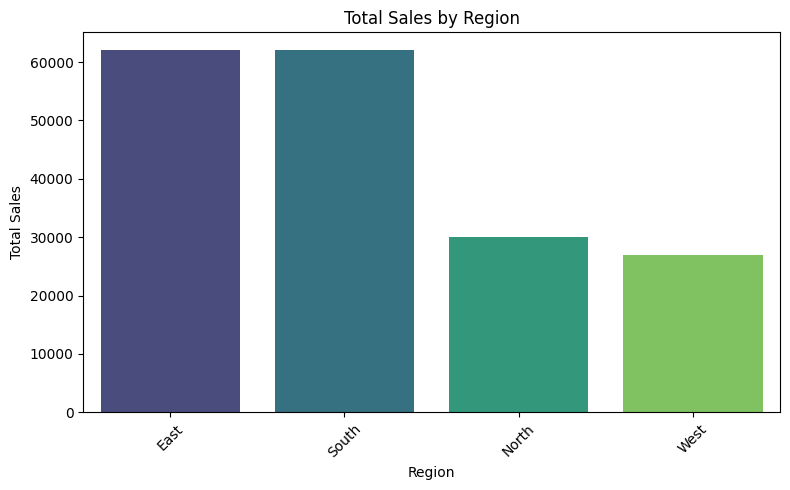

In [17]:
plt.figure(figsize=(8, 5))
sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette='viridis')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Total Sales by Category (Bar Chart)

This bar chart shows the total sales for each product category, highlighting which categories contribute most to overall revenue.

/tmp/ipython-input-2099919346.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_category.index, y=sales_by_category.values, palette='plasma')


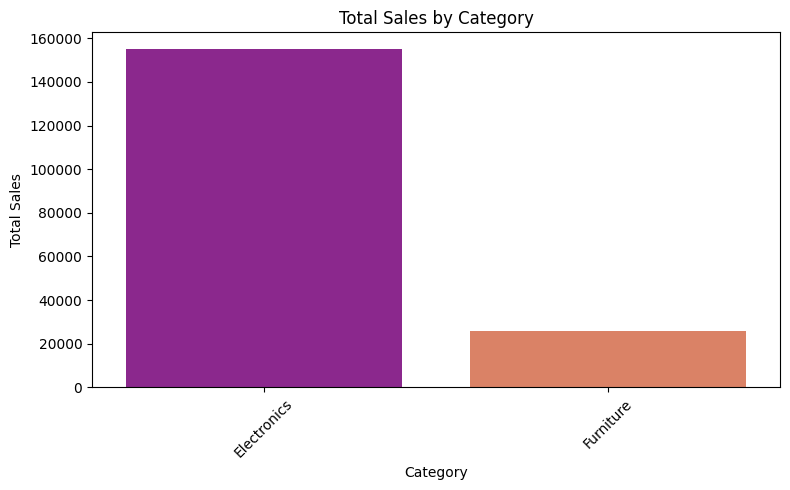

In [18]:
plt.figure(figsize=(8, 5))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values, palette='plasma')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Sales Distribution (Histogram)

A histogram visualizing the distribution of sales amounts. This helps us understand the frequency of different sales values, indicating if sales are typically low, high, or evenly distributed.

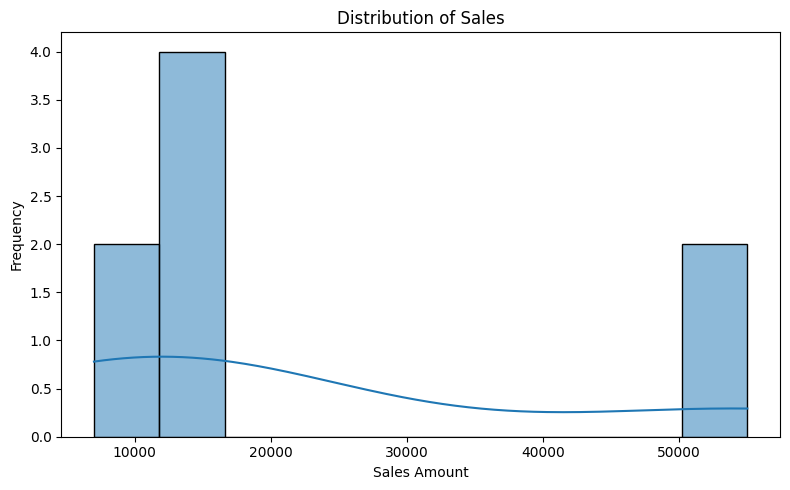

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales'], kde=True, bins=10) # kde=True adds a density curve
plt.title('Distribution of Sales')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Sales vs Quantity (Scatter Plot)

This scatter plot shows the relationship between the quantity of items sold and the corresponding sales amount. It can help identify if higher quantities generally lead to higher sales or if there are other factors at play.

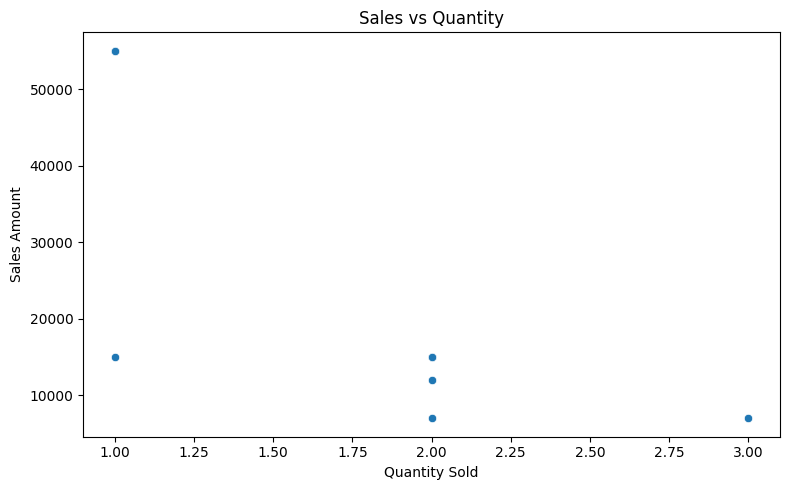

In [20]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Quantity'], y=df['Sales'])
plt.title('Sales vs Quantity')
plt.xlabel('Quantity Sold')
plt.ylabel('Sales Amount')
plt.tight_layout()
plt.show()

## 🧠 SECTION 6: KEY INSIGHTS (THIS IS THE MONEY PART)

Based on our comprehensive analysis and visualizations, here are the key insights:

1.  **Electronics Dominance**: The 'Electronics' category accounts for an overwhelming majority of total sales revenue (approximately 85%), making it the primary driver of the business. This highlights a strong dependency on this segment.
2.  **Regional Performance Imbalance**: The East and South regions are clear frontrunners, collectively generating over 60% of total sales. Conversely, the West region significantly underperforms, contributing the least to overall revenue.
3.  **High-Value Product Impact**: 'Laptop' sales alone contribute roughly 55% of the total revenue, indicating that high-value individual products are critical for overall financial performance, even if their transaction frequency might be lower than other items.
4.  **Sales Not Solely Quantity-Driven**: The scatter plot between Sales and Quantity suggests that while a positive correlation generally exists, high sales amounts are not always directly proportional to high quantities. This implies the presence of premium or high-priced items that generate substantial revenue with fewer units sold.
5.  **Targeted Regional Strategy Needed**: The substantial disparity in regional performance, particularly the low sales in the West, indicates a need for a targeted regional strategy to identify underlying causes (e.g., market competition, distribution issues, or product fit) and unlock untapped potential.
6.  **Limited Category Diversification**: The heavy reliance on the 'Electronics' category signifies a potential risk. Exploring strategies to boost sales in the 'Furniture' category or introducing new diverse product lines could create a more balanced and resilient revenue stream.
7.  **Opportunity for Optimization in Top Products**: Given the significant contribution of 'Laptop' and 'Phone' sales, optimizing their supply chain, marketing, and sales processes in high-performing regions (East and South) could further amplify revenue.

## 📌 SECTION 7: CONCLUSION

What should the business focus on?

Reinforce Electronics Dominance: Continue strategic investment in the high-performing 'Electronics' category, especially 'Laptops' and 'Phones'.
Target West Region Growth: Develop strategies to address underperformance and unlock potential in the West region.
Diversify Product Portfolio: Explore boosting 'Furniture' sales or introducing new categories to balance revenue streams.
Leverage Premium Products: Focus on high-value items that drive significant revenue with fewer units sold.
Any limitations of data?

Limited Timeframe: Prevents analysis of seasonal trends or long-term growth.
No Customer Demographics: Limits customer segmentation and personalized marketing.
Absence of Cost Data: Prevents profitability analysis, only revenue was assessed.
Lack of Competitor Data: Hinders market positioning and competitive analysis.
Restricted Feature Set: Missing details like promotions, sales channels, or reviews.
What would you analyze next if more data existed?

Time Series Analysis: To identify seasonality, growth, and forecast future sales.
Customer Segmentation: To understand purchasing habits and personalize strategies.
Profitability Analysis: To identify most profitable products, categories, and regions.
Market Basket Analysis: To find product associations for cross-selling.
Promotional Effectiveness: To measure the impact of marketing campaigns.
Geospatial Analysis: For optimal store locations or targeted micro-markets.